In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [2]:
# Read in an image
image = mpimg.imread('images/signs_vehicles_xygrad.png')

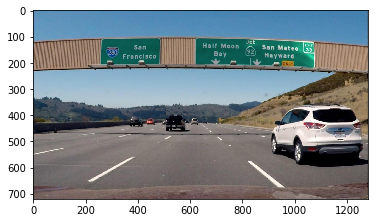

In [3]:
plt.imshow(image)

In [6]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take the gradient with respect to x and y
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Calculate the magnitude
    magnitude = np.sqrt(np.square(sobelx) + np.square(sobely))
    
    # Scale to 8-bit
    scaled = np.uint8(255*magnitude/np.max(magnitude))
    
    # Create mask
    mask = np.zeros_like(scaled)
    mask[(scaled >= mag_thresh[0]) & (scaled < mag_thresh[1])] = 1
    return mask

In [7]:
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))

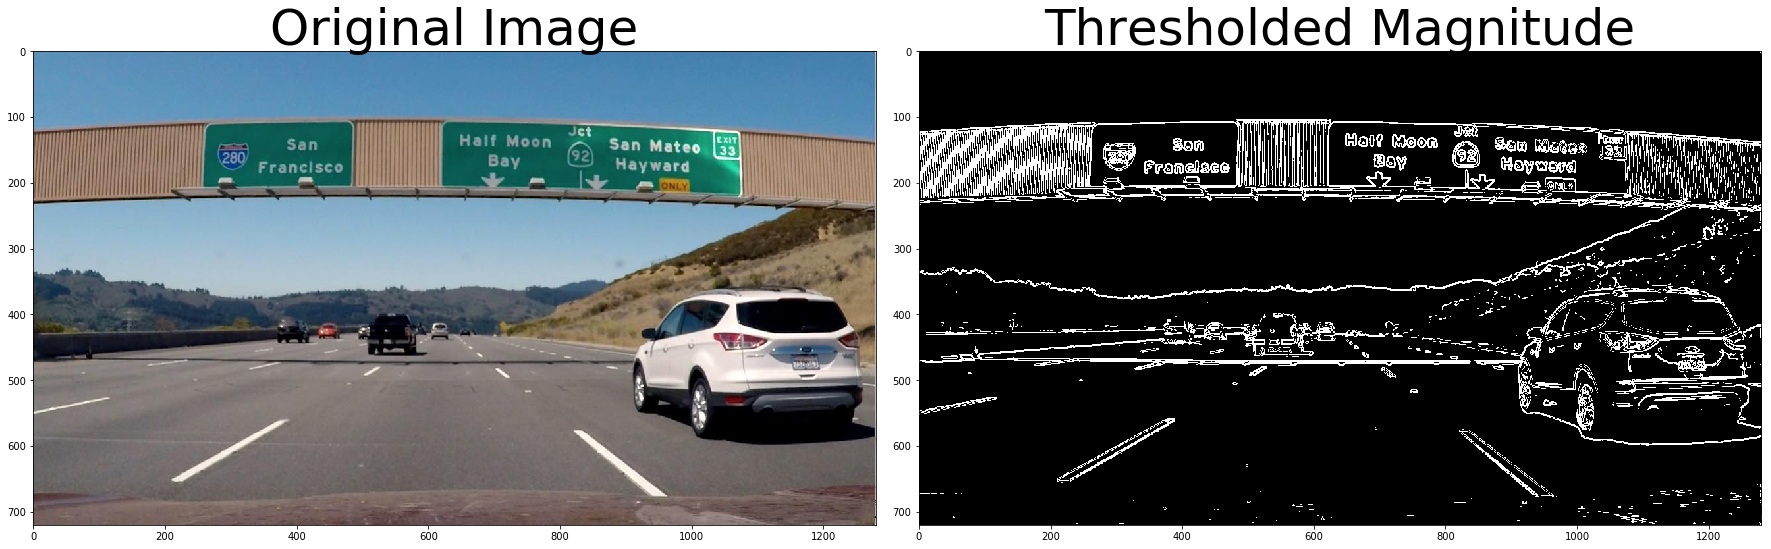

In [10]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)